# LSTM과 CNN을 조합해 영화 리뷰 분류하기

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout_4 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_4 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 lstm_4 (LSTM)               (None, 55)                26400     
                                                                 
 dense_4 (Dense)             (None, 1)                 56        
                                                      

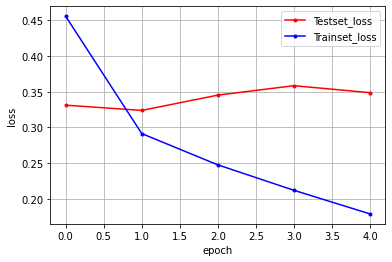

In [9]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

# seed 값 설정합니다.
seed = 0
numpy.random.seed(seed)
tf.compat.v1.set_random_seed(seed)


# MNIST 데이터 불러옵니다.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

# 데이터 전처리 합니다.

x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

# 모델을 설정 합니다.
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

# 모델 실행 환경 설정합니다.
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


# 모델을 실행합니다.
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=100)

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy : %.4f" %(model.evaluate(x_test, y_test)[1]))

# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현합니다.
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', c="blue", label="Trainset_loss")

# 그래프에 그리드를 주고 레이블을 표시합니다.
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [7]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

# seed 값 설정합니다.
seed = 0
numpy.random.seed(seed)
tf.compat.v1.set_random_seed(seed)


# MNIST 데이터 불러옵니다.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

print(y_train)

TypeError: Unrecognized keyword arguments: {'test_split': 0.2}.